=== Tabla de Frases con Rimas ===
  Rima                                  Frases Originales  \
0  lma  La vida me enseña, no pierdo la calma, Trabajo...   
1  ama  Sigo adelante aunque el mundo no me llama, Rim...   
2  rte  Cada caída solo me hace más fuerte, Juego mis ...   

                       Frases Generadas  
0         La vida me ... llenar el alma  
1  Sigo adelante aunque ... no me llama  
2      Cada caída solo ... en mi suerte  


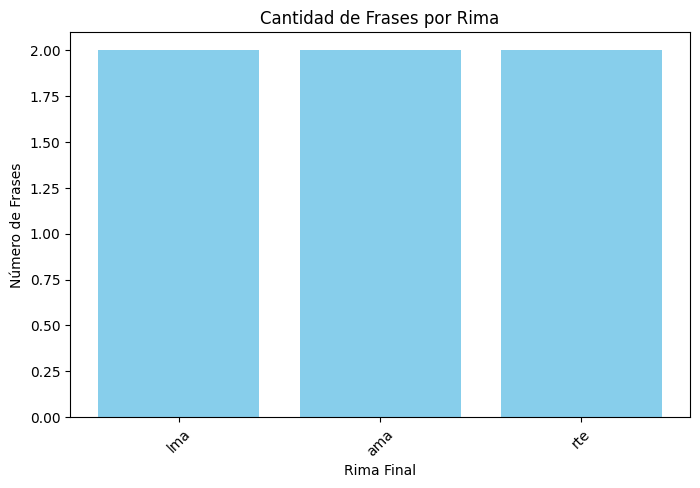

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Lista base de frases estilo rap
frases_base = [
    "La vida me enseña, no pierdo la calma",
    "Trabajo constante pa' llenar el alma",
    "Sigo adelante aunque el mundo no me llama",
    "Rimo con fuego, tengo encendida la llama",
    "Cada caída solo me hace más fuerte",
    "Juego mis cartas, confío en mi suerte"
]

# Función para extraer los últimos 3 caracteres

def extraer_rima(frase, n=3):
    return frase[-n:]

# Crear un diccionario para agrupar por rimas
rimas = {}
for frase in frases_base:
    clave = extraer_rima(frase)
    if clave in rimas:
        rimas[clave].append(frase)
    else:
        rimas[clave] = [frase]

# Crear frases nuevas combinando partes y manteniendo la rima
frases_nuevas = []
for clave, grupo in rimas.items():
    if len(grupo) >= 2:
        inicio = random.choice(grupo).split()[:3]  # Primeras 3 palabras
        fin = random.choice(grupo).split()[-3:]   # Últimas 3 palabras
        nueva_frase = ' '.join(inicio + ["..."] + fin)
        frases_nuevas.append((nueva_frase, clave))

# Crear DataFrame con las frases originales y nuevas
df = pd.DataFrame({
    "Rima": list(rimas.keys()),
    "Frases Originales": [', '.join(grupo) for grupo in rimas.values()],
    "Frases Generadas": [', '.join(f for f, _ in frases_nuevas if f.endswith(clave)) for clave in rimas.keys()]
})

# Mostrar tabla
print("=== Tabla de Frases con Rimas ===")
print(df)

# Gráfico de cantidad de frases por rima
plt.figure(figsize=(8, 5))
plt.bar(rimas.keys(), [len(grupo) for grupo in rimas.values()], color='skyblue')
plt.xlabel("Rima Final")
plt.ylabel("Número de Frases")
plt.title("Cantidad de Frases por Rima")
plt.xticks(rotation=45)
plt.show()

Genera más frases nuevas con combinaciones aleatorias.

Organiza los datos en una tabla estructurada con Pandas.

Muestra un gráfico de barras con la cantidad de frases por rima.

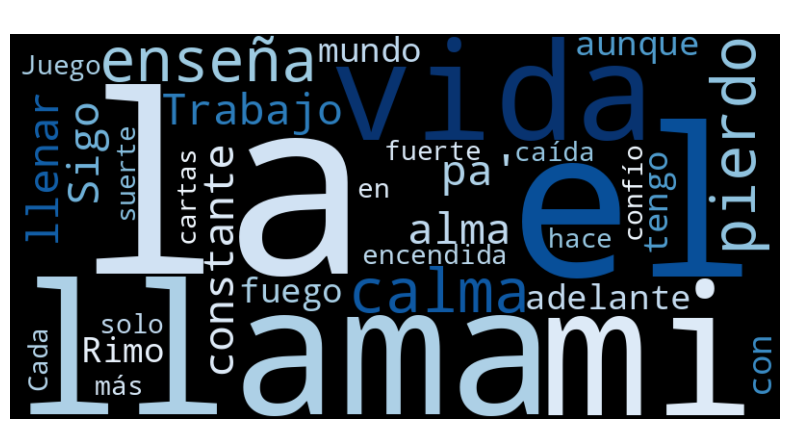

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todas las frases en un solo texto
texto = " ".join(frases_base)

# Crear la nube de palabras
nube_palabras = WordCloud(width=800, height=400, background_color="black", colormap="Blues").generate(texto)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation="bilinear")
plt.axis("off")  # No mostrar los ejes
plt.title("Nube de palabras del generador de rap", fontsize=15, color="white")
plt.show()

Lo que hace el código:

Unir las frases: Junta todas las frases en un solo texto para que las palabras se puedan analizar en conjunto.

Generar la nube de palabras: Crea una visualización donde las palabras más frecuentes se muestran más grandes.

Visualización: Muestra la nube de palabras en una ventana con un fondo oscuro y colores fríos, lo que le da un toque visual chido.

Después de correr este código, verás una imagen donde las palabras que más se repiten en tus frases se muestran más grandes, y puedes visualizar rápidamente qué términos son los más importantes en el estilo "rap" que creamos.

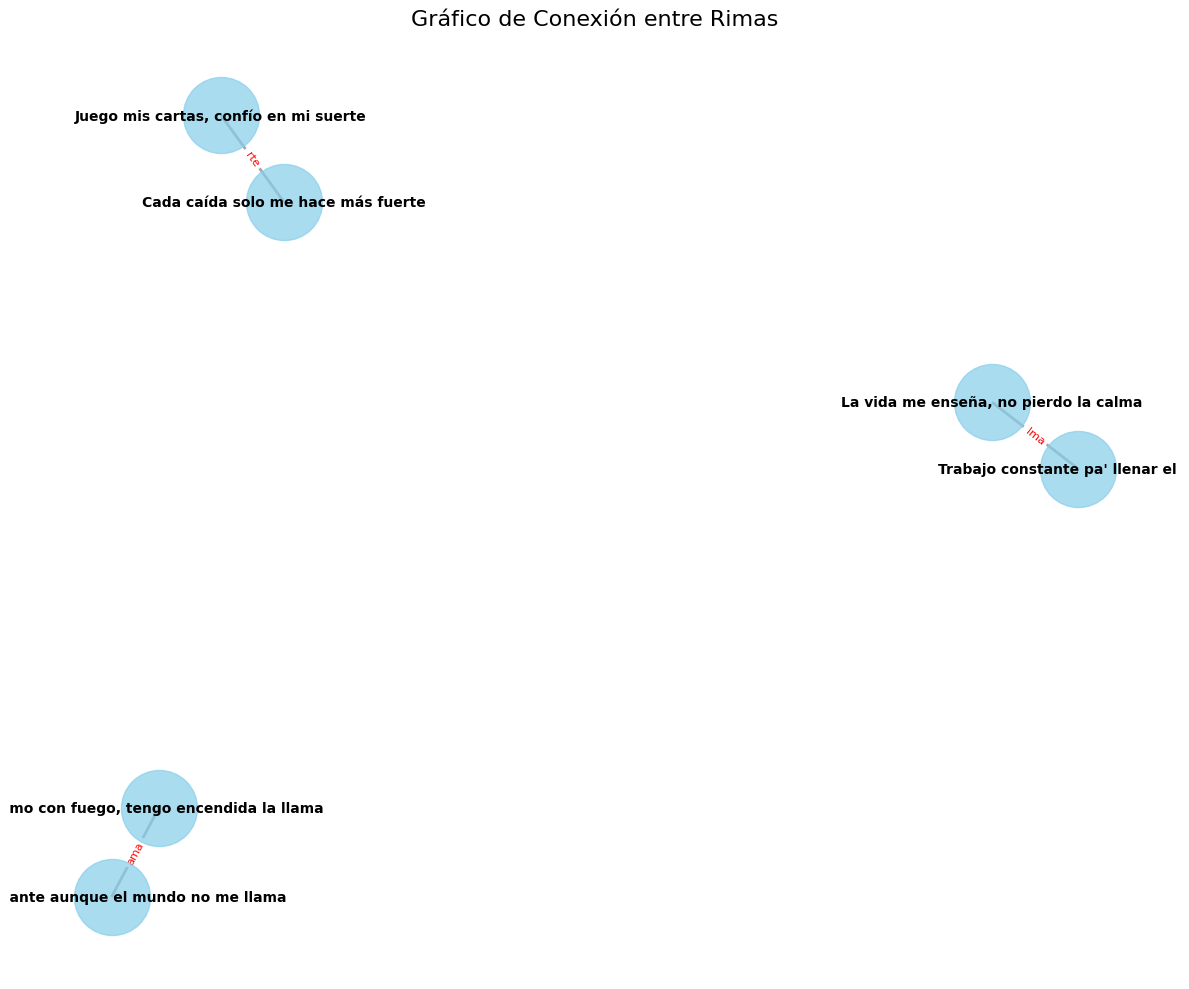

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos y conexiones (relaciones de rima)
for clave, grupo in rimas.items():
    for i in range(len(grupo)):
        for j in range(i+1, len(grupo)):
            # Conectar frases con la misma rima
            G.add_edge(grupo[i], grupo[j], label=clave)

# Dibujar el grafo
plt.figure(figsize=(12, 10))  # Ajustamos el tamaño de la figura
pos = nx.spring_layout(G, k=0.5, seed=42)  # Layout para distribuir los nodos de manera más clara

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="skyblue", alpha=0.7)

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color="grey")

# Dibujar las etiquetas de los nodos (frases)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", font_color="black", verticalalignment="center")

# Etiquetas de las rimas
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="red")

# Título y mostrar la gráfica
plt.title("Gráfico de Conexión entre Rimas", fontsize=16)
plt.axis("off")  # No mostrar los ejes
plt.tight_layout()  # Ajustar la disposición para evitar que se superpongan las etiquetas
plt.show()

Lo que hace el código:
Construir el grafo: Creamos un grafo donde cada frase es un nodo y las frases que comparten la misma rima están conectadas por una arista (línea).

Distribución y visualización: Usamos spring_layout para distribuir los nodos de manera atractiva. Luego, dibujamos los nodos, las aristas, y las etiquetas de las rimas (los colores de las conexiones).

Mostrar el gráfico: Utilizamos matplotlib para visualizar cómo se conectan las frases de acuerdo con las rimas.

Este gráfico te permitirá ver de manera clara cómo las frases que comparten rimas similares se agrupan y se conectan, creando una red visualmente atractiva.

Ajustes realizados:
Tamaño de la figura: Se ajustó el tamaño de la figura para que el gráfico tenga más espacio.

Posición de los nodos: Se modificó el parámetro k en spring_layout() para distribuir mejor los nodos y evitar que se sobrepongan.

Tamaño de las etiquetas: Se ajustaron las etiquetas de los nodos y las aristas para que no se vean apretadas ni borrosas.

Disposición: Se usó tight_layout() para que el gráfico se ajuste mejor a la ventana y no haya recortes.

In [6]:
import random
import nltk
from nltk.corpus import wordnet

# Descargar recursos de NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')

# Lista base de frases estilo rap
frases_base = [
    "La vida me enseña, no pierdo la calma",
    "Trabajo constante pa' llenar el alma",
    "Sigo adelante aunque el mundo no me llama",
    "Rimo con fuego, tengo encendida la llama",
    "Cada caída solo me hace más fuerte",
    "Juego mis cartas, confío en mi suerte"
]

# Función para obtener sinónimos de una palabra
def obtener_sinonimos(palabra):
    sinonimos = set()
    for syn in wordnet.synsets(palabra):
        for lemma in syn.lemmas():
            sinonimos.add(lemma.name())
    return list(sinonimos)

# Función para reemplazar palabras en una frase por sinónimos
def reemplazar_por_sinonimos(frase):
    palabras = frase.split()
    frase_nueva = []

    for palabra in palabras:
        # Obtener sinónimos para cada palabra
        sinonimos = obtener_sinonimos(palabra)
        if sinonimos:
            palabra_nueva = random.choice(sinonimos)
            frase_nueva.append(palabra_nueva)
        else:
            frase_nueva.append(palabra)

    return ' '.join(frase_nueva)

# Crear nuevas frases más creativas
frases_creativas = []
for frase in frases_base:
    frase_creativa = reemplazar_por_sinonimos(frase)
    frases_creativas.append(frase_creativa)

# Mostrar frases originales y creativas
print("=== Frases originales ===\n")
for frase in frases_base:
    print(f"- {frase}")

print("\n=== Frases creativas generadas ===\n")
for frase in frases_creativas:
    print(f"- {frase}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


=== Frases originales ===

- La vida me enseña, no pierdo la calma
- Trabajo constante pa' llenar el alma
- Sigo adelante aunque el mundo no me llama
- Rimo con fuego, tengo encendida la llama
- Cada caída solo me hace más fuerte
- Juego mis cartas, confío en mi suerte

=== Frases creativas generadas ===

- LA vida Maine enseña, No pierdo Pelican_State calma
- Trabajo constante pa' llenar elevated alma
- Sigo adelante aunque elevated_railway mundo nobelium Maine llama
- Rimo confidence_trick fuego, tengo encendida la llama
- Cada caída unaccompanied Maine hace más fuerte
- Juego MI cartas, confío en myocardial_infarct suerte


Qué hace este código?
Obtención de sinónimos: Usamos nltk y su módulo wordnet para obtener sinónimos de cada palabra en las frases originales.

Reemplazo de palabras: Reemplazamos cada palabra en las frases por uno de sus sinónimos de manera aleatoria, creando nuevas versiones de las frases.

Frases más creativas: Generamos una lista de nuevas frases con combinaciones más variadas y espontáneas.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


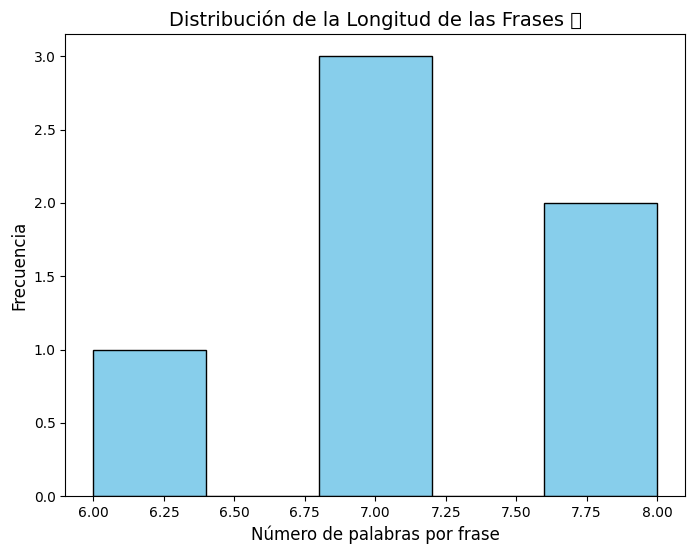

In [7]:
import matplotlib.pyplot as plt

# Lista base de frases estilo rap
frases_base = [
    "La vida me enseña, no pierdo la calma",
    "Trabajo constante pa' llenar el alma",
    "Sigo adelante aunque el mundo no me llama",
    "Rimo con fuego, tengo encendida la llama",
    "Cada caída solo me hace más fuerte",
    "Juego mis cartas, confío en mi suerte"
]

# Calcular la longitud de cada frase (número de palabras)
longitudes = [len(frase.split()) for frase in frases_base]

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(longitudes, bins=5, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Distribución de la Longitud de las Frases 📏', fontsize=14)
plt.xlabel('Número de palabras por frase', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la gráfica
plt.show()


Qué hace este código?
Calcula la longitud de las frases: Para cada frase en la lista frases_base, contamos cuántas palabras tiene usando len(frase.split()).

Histograma: Usamos matplotlib para generar un histograma que muestra la frecuencia de las frases según el número de palabras que contienen.

Personalización: Añadimos títulos y etiquetas para que el gráfico sea más claro.